In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# DATA PREPARATION

In [4]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1 ,'no':0})
df['basement']=df['basement'].map({'yes':1 ,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1 ,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1 ,'no':0})

#df1=pd.get_dummies(df,columns=['mainroad','guestroom','basement','prefarea','hotwaterheating','airconditioning'])

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [5]:
status=pd.get_dummies(df['furnishingstatus'])

In [5]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [6]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [7]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [7]:
df=pd.concat([df,status],axis=1)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [8]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [52]:
df['areaperbedroom']=df['area']/df['bedrooms']
df['bbratio']=df['bathrooms']/df['bedrooms']

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [10]:
def normalize(x):
  return ((x-np.min(x))/(max(x)-min(x)))

df=df.apply(normalize)  


# Spliting data into train & test

In [11]:
X=df.drop('price',axis=1)
Y=df['price']

In [12]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression().fit(x_train,y_train)

In [17]:
lr.coef_,lr.intercept_

(array([ 0.30045358,  0.04673453,  0.28623478,  0.10851563,  0.05044144,
         0.03042826,  0.02159488,  0.08486327,  0.06688093,  0.06073533,
         0.05942788,  0.00092052, -0.03100561]), 0.01619199237591787)

In [18]:
y_pred=lr.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error,r2_score

In [20]:
mse=mean_absolute_error(y_test,y_pred)
r2_square=r2_score(y_test,y_pred)

In [21]:
mse,r2_square

(0.07237224835503227, 0.6729582743459919)

In [22]:
import statsmodels.api as sm
x_train_sm=x_train
x_train_sm=sm.add_constant(x_train_sm)
lr_1=sm.OLS(y_train,x_train_sm).fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
lr_1.params

const              0.016192
area               0.300454
bedrooms           0.046735
bathrooms          0.286235
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [24]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           8.83e-83
Time:                        19:57:49   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.021     

Text(0, 0.5, 'Housing price')

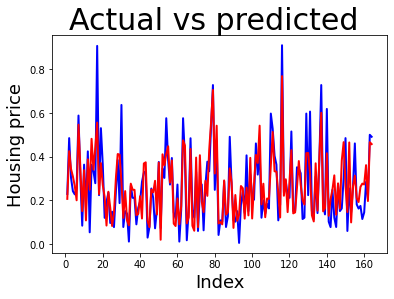

In [29]:
#plot actual and predicted graph comparison
import matplotlib.pyplot as plt
c = [i for i in range (1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color="Blue",linewidth=2.0,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2.0,linestyle="-")
fig.suptitle("Actual vs predicted",fontsize=30)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing price",fontsize=18)

Text(0, 0.5, 'Housing price')

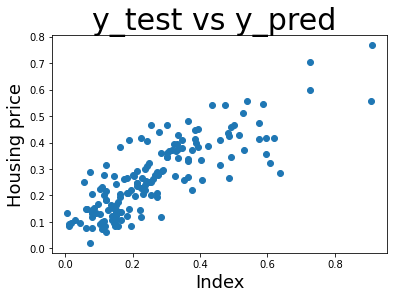

In [31]:
#plotting y_test and y_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred",fontsize=30)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing price",fontsize=18)

Text(0, 0.5, 'Housing price')

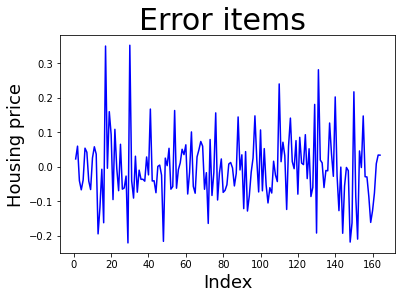

In [32]:
c = [i for i in range (1,165,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue")
fig.suptitle("Error items",fontsize=30)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing price",fontsize=18)

In [33]:
from math import  sqrt
import numpy as np
rmse=np.sqrt(mse)

In [34]:
rmse

0.2690209069106568

Implementing result and running model again

# Extra stuff

In [35]:
x_train_new=x_train.drop('semi-furnished',axis=1)
x_test_new=x_test.drop('semi-furnished',axis=1)

In [36]:
x_test_new,x_test

(         area  bedrooms  bathrooms  ...   parking  prefarea  unfurnished
 265  0.084536       0.4   0.000000  ...  0.000000       1.0          0.0
 54   0.298969       0.4   0.333333  ...  0.333333       0.0          0.0
 171  0.592371       0.4   0.000000  ...  0.333333       1.0          0.0
 244  0.252234       0.4   0.000000  ...  0.000000       1.0          0.0
 268  0.226804       0.6   0.000000  ...  0.000000       0.0          0.0
 ..        ...       ...        ...  ...       ...       ...          ...
 413  0.020619       0.4   0.333333  ...  0.000000       1.0          1.0
 191  0.621993       0.4   0.000000  ...  0.000000       0.0          0.0
 310  0.297938       0.4   0.000000  ...  0.000000       0.0          0.0
 46   0.298969       0.4   0.333333  ...  0.333333       0.0          0.0
 50   0.397938       0.4   0.333333  ...  0.333333       1.0          1.0
 
 [164 rows x 12 columns],
          area  bedrooms  bathrooms  ...  prefarea  semi-furnished  unfurnished
 265

In [37]:
lr.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred_new=lr.predict(x_test_new)

In [39]:
mse_new=mean_absolute_error(y_test,y_pred_new)
r_sq=r2_score(y_test,y_pred_new)

In [40]:
mse_new,r_sq

(0.07232301555391965, 0.6731013119788614)

# Building Linera Model

In [41]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
lr_2=sm.OLS(y_train,x_train).fit()

In [42]:
lr_2.params

const              0.016192
area               0.300454
bedrooms           0.046735
bathrooms          0.286235
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [43]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           8.83e-83
Time:                        20:16:32   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.021     

Text(0, 0.5, 'Housing price')

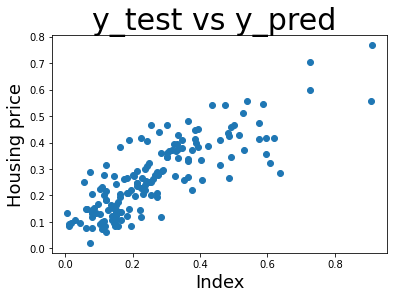

In [47]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred",fontsize=30)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing price",fontsize=18)

Text(0, 0.5, 'Housing price')

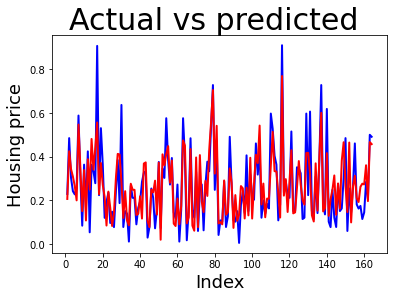

In [46]:
import matplotlib.pyplot as plt
c = [i for i in range (1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color="Blue",linewidth=2.0,linestyle="-")
plt.plot(c,y_pred_new,color="red",linewidth=2.0,linestyle="-")
fig.suptitle("Actual vs predicted",fontsize=30)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing price",fontsize=18)

Text(0.5, 0.98, 'new Error items')

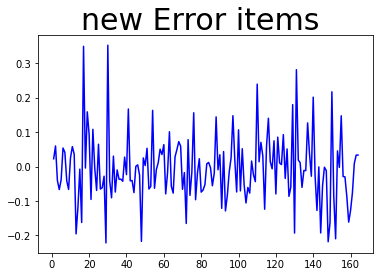

In [54]:
c = [i for i in range (1,165,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred_new,color="blue")
fig.suptitle("new Error items",fontsize=30)


In [51]:
rmse_new=sqrt(mse_new)

In [53]:
rmse_new

(0.2689293876725258, 0.2689293876725258)